# 5. Functions and Objects

## 5.1 What is a function?

>"Functions should do one thing. They should do it well. They should do it only." - Robert C. Martin

In the mathematical sense, functions are a way to describe the relationship between numbers. A common function that most are familiar with is from basic linear algebra, the equation for a line: $$y = a + bx.$$ This equation describes the relationship between the variables $x$ and $y$ using a set of linear parameters known as the slope $b$, which describes the angle of the line, and the intercept $a$ which describes the y-value where $x = 0$.

Let's plot an example...



In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
# Here we are importing the basic plotting library matplotlib,
# and the basic numerical library numpy, but don't worry about this just yet...

In [ ]:
x = np.linspace(start=0, stop=1, num=100) # 100 linearly spaced values between 0 and 1, more on this later...
a = 1
b = 2
y = a + b * x

plt.plot(x, y, 'k-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

At some point in your academic career, you may have noticed that the notation for this linear equation changed to $$f(x) = a + bx ,$$ and, depending on the quality of your math teachers, the reason for this switch may or may not have been properly explained.

Put simply, while $y$ describes the output of the right side of the equation $a + bx$ for some values of $x$, $a$, and $b$, it does not describe the equation itself. This is why $f(x)$ is used instead. In other words, $f(x)$ is not a *variable* but a *relationship between variables*. In this case $f(x)$ describes the relationship between $x$ and $y$, such that: $$ y = f(x) = a + bx$$ for all real values of $x$, $a$, and $b$, or described with more proper mathematical notation $x, a, b \in \mathcal{R}$ where $\mathcal{R}$ is the set of all real numbers and $\in$ denotes a subset.

## 5.2 Functions in Python

>“Before software can be reusable it first has to be usable.” – Ralph Johnson

OK, enough math! While functions originated as a mathematical concept, in programming they need not be exact mathematical equations. In simple terms, a function allows you to generalize a relationship without having to explicitly define what the values of the variables are *a priori*.

This allows us to generalize our code, which creates three desirable properties:

1. modularity
2. reusability
3. extensibility

When our code is organized into distinct, logical modules like functions, this allows us to reuse our code in new situations, without having to rewrite the code again. It also allows us to extend our code by using it as a part of more complex functions or code bases. As you grow your own code base and your functions become more complex, using separate functions for each logical step of your code to increase *modularity* also makes it easier to track down bugs or modify and improve your code in the future.

A simple way to remember this concept is that you should keep your code **DRY** or:

<b>D</b>on't <b>R</b>epeat <b>Y</b>ourself

if your code isn't DRY, then it's **WET**:

<b>W</b>rite <b>E</b>verything <b>T</b>wice

Keep your code DRY! It makes life easier for your future self.

OK, sounds great! But how do we implement functions in Python? As with most things in Python, it's not complicated. Let's return to our simple linear equation $f(x) = a + bx$...

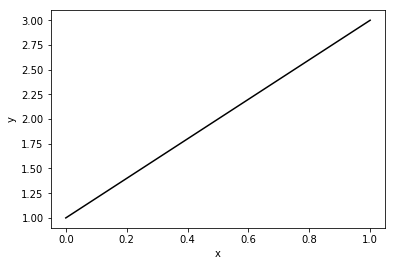

In [4]:
# First we define our function...
def my_really_long_function_name(x): # define our input
    a = 1
    b = 2
    y = a + b * x
    return y # define our output

# Now let's plot it...
x = np.linspace(0, 1, 100)
y = my_really_long_function_name(x)

plt.plot(x, y, 'k-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As you can see, functions in Python are very straightforward. You define the name of the function by typing `def` and then the name of the function such as `f` or `my_function` (with no spaces), and you define the parameters, or *arguments*, of the function by putting variable names in parentheses after the name of the function such as `my_function(arg1, arg2, arg3)`. You then **"call"** the function using parentheses `f(x)` to return the output. Functions in Python are also very flexible. For example, let's say we want to be able to change the values of $a$ and $b$, we simply add $a$ and $b$ to our set of input arguments like so...

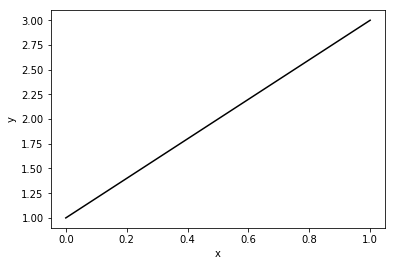

In [8]:
def f(x, a, b): 
    return a + b * x 

x = np.linspace(0, 1, 100)
y = f(x, a, b) # positional argument
y = f(x=x, a=a, b=b) # keyword argument

plt.plot(x, y, 'k-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

This allows us to change the values of $a$ and $b$ on the fly without having to explicitly define them within the function itself. But let's say most of the time we know $a$ and $b$ will be a specific value, so we don't want to type that value every time we use our function $f(x, a, b)$. But if we don't provide our function with values for $a$ and $b$, Python complains and gives an error message...

In [9]:
f(x)

TypeError: f() missing 2 required positional arguments: 'a' and 'b'

Thankfully, Python let's us be lazy when we want to by defining default values for our function's arguments. We can do this like so:

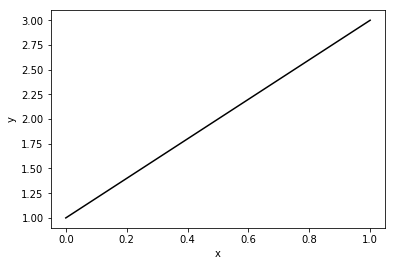

In [10]:
def f(x, a=1, b=2): 
    return a + b * x 

x = np.linspace(0, 1, 100)
y = f(x) # No error message!

plt.plot(x, y, 'k-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Just be careful about *where* you define your default arguments (always put them at the end)...

In [11]:
def f(a=1, x, b=2): 
    return a + b * x 

SyntaxError: non-default argument follows default argument (<ipython-input-11-ebb33257e1b8>, line 1)

We can also do really crazy things like defining functions within functions!

In [12]:
def f(a):
    def g(x):
       return a + x
    return g

g = f(1)

print(g(1))

2


In [14]:
def f(g, x):
    return g(x) + g(x)**2

def g(x):
    return x+1

f(g, 1)

6

## 5.3 Packages and Modules

>"Telling a programmer there's already a library to do X is like telling a songwriter there's already a song about love." - Pete Cordell


You may have noticed in the first example that we imported two "libraries" called `numpy` and `matplotlib`. But you may be wondering what is a "library" and what does it mean to "import" one? Well, basically a library is just an organized collection of functions that other smarter people have written and optimized for other programmers to use. When we import these libraries we are simply defining them within the **"namespace"** of our Python environment. A namespace is simply the set of variable and function names that we use to define things in our environment. This definition may sound vague, but hopefully it will be made clear in the next section...

The two libraries we imported above are two of the most basic and widely-used libraries in the Python ecosystem. `numpy` is an abbreviation for "numerical python", while `matplotlib` is an abbreviation for "mathematical plotting library".

In Python, programmers often make the distinction between "packages" and "modules", and while the difference between the two is often unclear, a **module** typically describes a smaller collection of code that is designed for a specific purpose, such as linear algebra, while a **package** is a larger code base that includes many modules. Often the terms are used interchangeably, but the distinction is not incredibly important.

There are many other packages written in Python that can easily be downloaded and installed using a "package manager" such as `conda` or `pip`. A general rule is that if there's something you want to do in Python, there already exists a package to do it! And if the package doesn't exist, you can easily create it yourself. Let's try that now...

In [15]:
%%file my_module.py

pi = 3.14

def my_pi_func(x):
    return pi*x


Writing my_module.py


You may be wondering what `%%` does. This is what's known as "jupyter magic", and in this case `%%file my_module.py` writes all the code in the notebook cell to a text file called `my_module.py` in the same directory as your current jupyter notebook. In practice, you would create this `.py` script yourself in a text editor, but here we'll use some "magic" to keep everything streamlined inside jupyter.

Now that we have a text file with our function inside, Python let's us easily import it into our notebook...

In [16]:
import my_module as mm # if you change my_module.py you need to restart your notebook to import the updated version

print(mm.my_pi_func(1))

3.14


## 5.3.1 A quick note on namespaces

Something to keep in mind with functions is that the namespace within the function does not leak into the namespace of the main environment. That is, if we define a variable within a function, it will not be available outside the function, like so...

In [17]:
__name__

'__main__'

In [19]:
def undefined_namespace_function(x):
    this_variable_is_not_defined = x + 1
    print(this_variable_is_not_defined)
    return x + 2

undefined_namespace_function(1)
print(this_variable_is_not_defined)

2


NameError: name 'this_variable_is_not_defined' is not defined

However, we can access the variable if we return it from the function's local namespace to the main namespace...

In [20]:
def defined_namespace_function(x):
    this_variable_is_defined = x + 1
    return this_variable_is_defined

this_variable_is_defined = defined_namespace_function(1)
print(this_variable_is_defined)

2


Also, keep in mind that if we define a variable outside a function, we can acess it from within the function, like so...

In [22]:
outside_variable = 10

def add(x):
    return outside_variable + x 

for idx in range(5):
    print(add(idx))

10
11
12
13
14


But if we try to modify it within the function Python throws an error...

In [23]:
outside_variable = 0

def add(x):
    outside_variable += x 
    return outside_variable

for idx in range(5):
    print(add(idx))

UnboundLocalError: local variable 'outside_variable' referenced before assignment

## 5.4 An introduction to objects

>"In the one and only true way. The object-oriented version of 'Spaghetti code' is, of course, 'Lasagna code'. (Too many layers)." - Roberto Waltman

You may have heard at some point that Python is an **"object-oriented"** programming language. But what does this mean and why is it useful? In simple terms, an "object" is just a way of organizing data and code into human-understandable units in your computer's memory such as a variable, a data structure, a function, or some combination of these. In programming terms, an object has two types of features that make it unique:

1. states (or "attributes")
2. methods

States are the variables or data that the object is holding internally, such as the values in a list. "State" is the generic computer science term, but in Python these are commonly called "attributes". Methods are defined ways for the object to interact with other objects or itself. For example, a `list` is actually an object, and when we call `len(my_list)`, we are actually telling Python to call an internal method within the `list` object `my_list.__len__()`. Where `__` tells Python that this method should be hidden from the user. Let's play around with this...

In [24]:
my_list = [1,2,3,4,5]
len(my_list)

5

In [25]:
my_list.__len__()

5

In [ ]:
my_list = [1,2,3,4,5]
print(len(my_list), my_list.__len__())

Notice that the values are the same, but when we call `len(my_list)` the code is much easier to read! The same is true when we access a specific index in a `list`, such as `my_list[0]`. When we index a list with square brackets we are actually calling an internal method in the list object...

In [26]:
print(my_list[0], my_list.__getitem__(0))

1 1


The square brackets simply tell Python to call the internal `__getitem__` method. Functions are also objects, and we can access their internal methods as well. For example, when we call a function using parentheses `f(x)` we again are actually accessing an internal method called `__call__`

In [27]:
mm.my_pi_func.__call__(1)

3.14

Even in the very simple case of adding, subtracting, or multiplying two variables together, such as `a * b`, we are still accessing internal methods for the variable objects `a.__mul__(b)`

In [28]:
a = 2
b = 5
print(a * b == a.__mul__(b))
print(a + b == a.__add__(b))
print(a - b == a.__sub__(b))
print(a - b == b.__sub__(a))


True
True
True
False


It turns out that each instance of base Python is also just a collection of objects. To demonstrate this, we can access methods from the `__builtin__` module that is available in every instance of Python and contains basic functions such as `len` and `max`

In [ ]:
my_list = [10,20,30]
print(__builtin__.len(my_list))
print(__builtin__.max(my_list))

In practice, we're not meant to access these internal hidden methods. Python is known as a **"high-level"** language, and this means that the code we interact with from day-to-day is an **abstracted** version of what is actually going on underneath. In most cases, this is a good thing. We don't need to know the exact details of everything that happens when we call functions and other mathematical operations, and this **abstraction** helps to make the code **easy to read and use**. This is one of the key features of Python, and we will discuss the importance of this later.

## 5.5 Dot notation
>“When you’re working in somebody else’s module, though, you’d better use his or her conventions. It’s part of learning to work with others.” - Ray Ozzie

It turns out that packages and modules are also technically objects!

For example, if we want to see what version of `numpy` we're using, we can simply call the `__version__` attribute.





In [29]:
import numpy as np

print(np.__version__)

1.15.2


Packages have internal properties, and they contain methods that you can call, such as functions. Yes, functions can also be methods.

As you may have noticed, the way to access methods and states within packages, modules, and other objects is with **"dot notation"**. We were already using dot notation earlier in the notes, such as with `np.linspace()` or when we explored the internal methods like `my_list.__getitem__()`. The dot, or period, `.` between the package name `np` and the function `linspace` tells the Python interpreter that we specifically want to use the function called `linspace` from within the numpy package (rather than some other function called `linspace`), and likewise when we called `__getitem__` we were calling the `__getitem__` for `my_list` rather than some other function named `__getitem__`. 

Let's test this...

In [30]:
def linspace(start, stop, num):
    return "This is not the function you're looking for"

print(np.linspace(start=0, stop=1, num=5))
print(linspace(start=0, stop=1, num=5))

[0.   0.25 0.5  0.75 1.  ]
This is not the function you're looking for


Notice that when we called `linspace`, Python was smart enough to call our own `linspace` function rather than the numpy function. However, you must be careful. You can easily overwrite your own functions like so...

In [32]:
from numpy import linspace

def linspace(start, stop, num):
    return "This is not the function you're looking for"


print(np.linspace(start=0, stop=1, num=5))
print(linspace(start=0, stop=1, num=5))

[0.   0.25 0.5  0.75 1.  ]
This is not the function you're looking for


In practice, Python programmers **always put their imports at the top of their script**, which makes this scenario unlikely.

In conclusion, dot notation is a simple but consistent way to organize Python code hierarchically where adding a `.` denotes the next level of the hierarchy. For example we defined `numpy` as `np` when we imported it `import numpy as np` and we can call functions from `numpy` by using dot notation, such as in the case of `np.linspace()`.

It's important to note that if you use another programming language **this will be different**, and in some programming languages such as R, the notation used to indicate hierarchical organization **changes depending on who is writing the code!** One of the many advantages of using Python is that there is simply no other way to organize code than by using dot notation. This makes for a more consistent experience across all Python packages, which is one of the many reasons Python has become so popular.

## 5.6 The numpy array

Now that we understand the basics of how objects work in Python, we can begin to start using one of the most fundamental data structures in programming, the **array**. In the case of Python, base Python does not have an array object, so instead the array object from the numpy package is the de facto standard for array-based programming in Python. 

Mathematically, an array is just a **tensor**. You should already be familiar with the two most common types of tensors: **vectors** (a 1-dimensional set of numbers), and **matrices** (a 2-dimensional set of numbers). Tensors are simply a generic version of vectors and matrices that can be an arbitrary number of dimensions: 3, 4, 5, or 10000 —the number of dimensions doesn't matter, these are all tensors.

Arrays have many advantages, but one of the most important ones is a concept called **vectorization**. Vectorization simply means we are doing lots of operations simultaneously. In practice this leads to code that is much faster and easier to read, and often we can completely avoid the use of for loops. 

A numpy array is a grid of values, all of the same type, and is indexed by nonnegative integers (similar to lists). The number of dimensions is the *rank* of the array; the *shape* of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [33]:
a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],
              [4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [ ]:
a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

## 5.6.1 Array indexing

Numpy offers several ways to index into arrays.

**Slicing**: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [34]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4],
              [5,6,7,8],
              [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:]

# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array

In [ ]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"


When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))  # Prints "[2 2]"

One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [ ]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  # prints "array([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])

**Boolean array indexing** lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"

## 5.6.2 Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"

x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)                         # Prints "int64"

## 5.6.3 Array math

Basic mathematical functions operate elementwise on arrays and are available both as operators (`*`,`/`,`+`,`-`, etc.) and as functions in the numpy module:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
print(np.add(x, y))

# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

Note that `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

Numpy provides many useful functions for performing computations on arrays; one of the most useful is sum:

In [ ]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

You can find the full list of mathematical functions provided by numpy [in the documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the `T` attribute of an array object:

In [ ]:
x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"


Numpy provides many more functions for manipulating arrays; you can see the full list [in the documentation](http://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html).




## 5.6.4 Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)

This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector `v` to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:



In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Stack 4 copies of v on top of each other
print(vv)                 # Prints "[[1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]
                          #          [1 0 1]]"
y = x + vv  # Add x and vv elementwise
print(y)  # Prints "[[ 2  2  4
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

Numpy broadcasting allows us to perform this computation without actually creating multiple copies of `v`. Consider this version, using broadcasting:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)  # Prints "[[ 2  2  4]
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if `v` actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
The arrays can be broadcast together if they are compatible in all dimensions.
After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension
If this explanation does not make sense, try reading the explanation [from the documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or [this explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as *universal* functions. You can find the list of all universal functions [in the documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [ ]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(x + v)

# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)

## 5.6.5 Numpy Documentation

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.